#### Performing audio analysis for two different types of patients

In [7]:
import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display
import pyworld as pw
import parselmouth

import matplotlib.pyplot as plt

import openl3
import soundfile as sf

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.signal import spectrogram

import torchaudio.transforms as T
import torchvision.transforms as transforms
from PIL import Image

import wave
import json
from vosk import Model, KaldiRecognizer

ModuleNotFoundError: No module named 'openl3'

In [3]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Access the dataframe that contains the MMSE scores associated with each audio wave
train_mmse = os.environ.get("TRAIN_MMSE")

# Access the environment variables for acoustic features
final_segmented_train_ad = os.environ.get("FINAL_SEGMENTED_TRAIN_AD")
final_segmented_train_cn = os.environ.get("FINAL_SEGMENTED_TRAIN_CN")
final_segmented_test = os.environ.get("FINAL_SEGMENTED_TEST")
train = os.environ.get("TRAIN")
test = os.environ.get("TEST")

# Access the environment variables for spectrogram
spectrogram_train_ad = os.environ.get("TRAIN_SPECTROGRAM_AD")
spectrogram_train_cn = os.environ.get("TRAIN_SPECTROGRAM_CN")
spectrogram_test = os.environ.get("TEST_SPECTROGRAM")
spectrogram_augmented_train_ad = os.environ.get("TRAIN_AUGMENTED_SPECTROGRAM_AD")
spectrogram_augmented_train_cn = os.environ.get("TRAIN_AUGMENTED_SPECTROGRAM_CN")

#### MFCC (Mel-Frequency Cepstral Coefficients)

The mel-frequency cepstrum (MFC) is a representation of the power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

-- Take the Fourier transform of a signal.

-- Map the powers of the spectrum obtained above onto the mel scale.

-- Take the logs of the powers at each of the mel frequencies.

-- Take the discrete cosine transform of the list of mel log powers.

-- The MFCCs are the amplitudes of the resulting spectrum.

1. For a person with Dementia

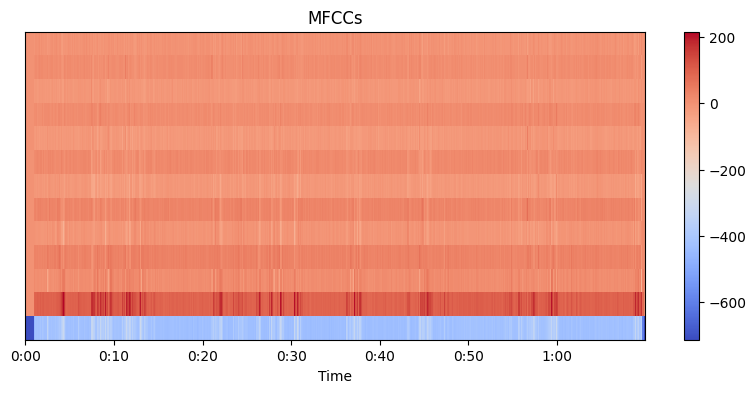

In [4]:
# Load audio file
audio_file_ad = final_segmented_train_ad + 'adrso027.wav'
y_ad, sr_ad = librosa.load(audio_file_ad, sr=None, dtype=np.float64)

# Setting a window_hop_length of 100ms
window_hop = 0.1

# Calculate the hop length based on the desired frame rate
hop_length_ad = int(window_hop * sr_ad)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y_ad, sr=sr_ad, n_mfcc=13, hop_length=hop_length_ad)

# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr_ad, hop_length=hop_length_ad)
plt.colorbar()
plt.title('MFCCs')
plt.show()

2. For a controls patient (Non-Dementia)

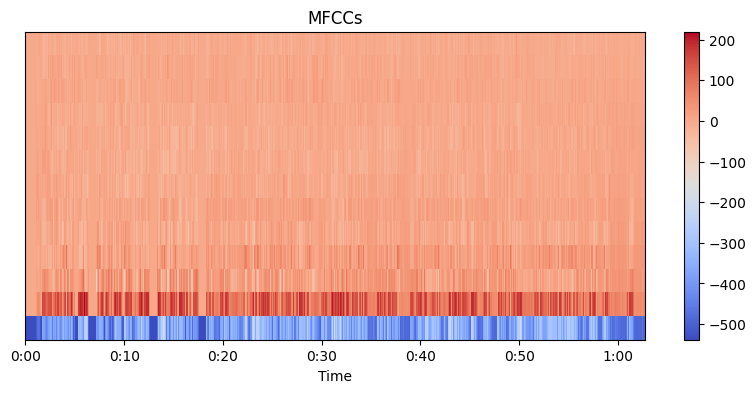

In [5]:
# Load audio file
audio_file_cn = final_segmented_train_cn + 'adrso005.wav'
y_cn, sr_cn = librosa.load(audio_file_cn, sr=None, dtype=np.float64)

# Setting a window_hop_length of 100ms
window_hop = 0.1

# Calculate the hop length based on the desired frame rate
hop_length_cn = int(window_hop * sr_cn)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y_cn, sr=sr_cn, n_mfcc=13, hop_length=hop_length_cn)

# Display MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr_cn, hop_length=hop_length_cn)
plt.colorbar()
plt.title('MFCCs')
plt.show()

#### MFCC Delta and MFCSS Delta-Delta

1. For a person with Dementia

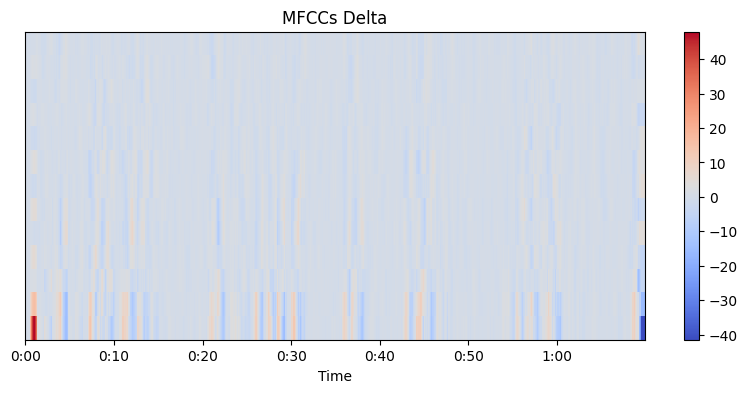

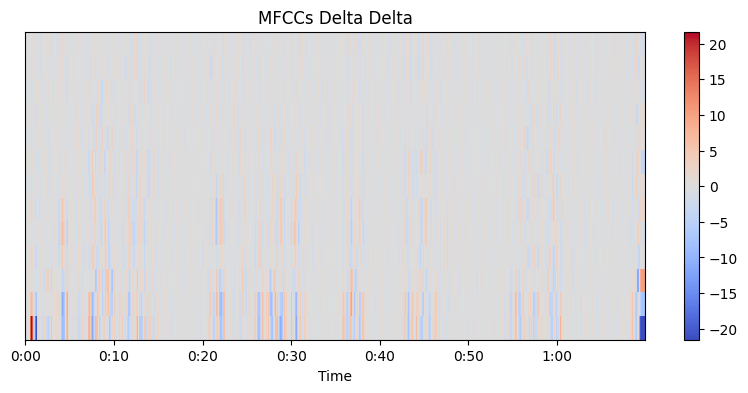

In [6]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y_ad, sr=sr_ad, n_mfcc=13, hop_length=hop_length_ad)

# Compute delta and delta-delta MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta_delta_mfccs = librosa.feature.delta(mfccs, order=2)

# Display MFCCs Delta
plt.figure(figsize=(10, 4))
librosa.display.specshow(delta_mfccs, x_axis='time', sr=sr_ad, hop_length=hop_length_ad)
plt.colorbar()
plt.title('MFCCs Delta')
plt.show()

# Display MFCCs Delta-Delta
plt.figure(figsize=(10, 4))
librosa.display.specshow(delta_delta_mfccs, x_axis='time', sr=sr_ad, hop_length=hop_length_ad)
plt.colorbar()
plt.title('MFCCs Delta Delta')
plt.show()

2. For a controls patient (Non-Dementia)

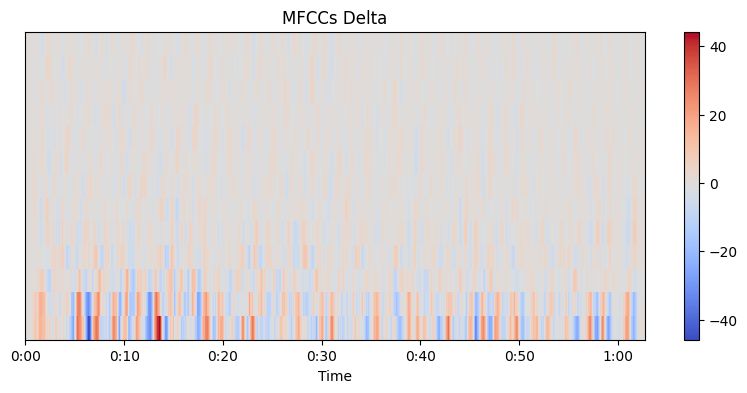

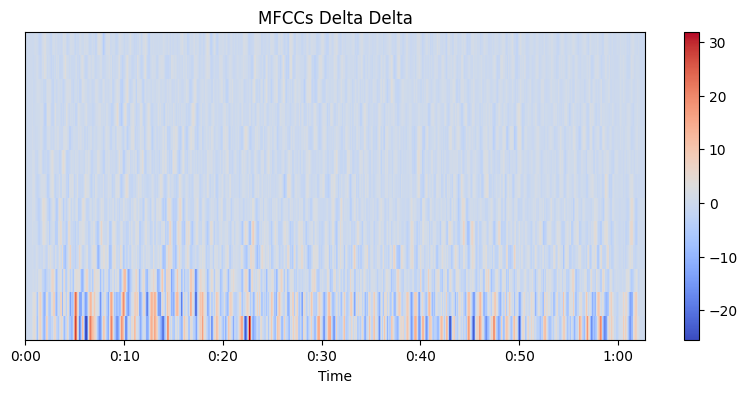

In [7]:
# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y_cn, sr=sr_cn, n_mfcc=13, hop_length=hop_length_cn)

# Compute delta and delta-delta MFCCs
delta_mfccs = librosa.feature.delta(mfccs)
delta_delta_mfccs = librosa.feature.delta(mfccs, order=2)

# Display MFCCs Delta
plt.figure(figsize=(10, 4))
librosa.display.specshow(delta_mfccs, x_axis='time', sr=sr_cn, hop_length=hop_length_cn)
plt.colorbar()
plt.title('MFCCs Delta')
plt.show()

# Display MFCCs Delta-Delta
plt.figure(figsize=(10, 4))
librosa.display.specshow(delta_delta_mfccs, x_axis='time', sr=sr_cn, hop_length=hop_length_cn)
plt.colorbar()
plt.title('MFCCs Delta Delta')
plt.show()

#### Chroma Feature Analysis

-- Chroma-based features, which are also referred to as "pitch class profiles", are a powerful tool for analyzing music whose pitches can be meaningfully categorized (often into twelve categories) and whose tuning approximates to the equal-tempered scale.

-- One main property of chroma features is that they capture harmonic and melodic characteristics of sound.

1. For a person with Dementia

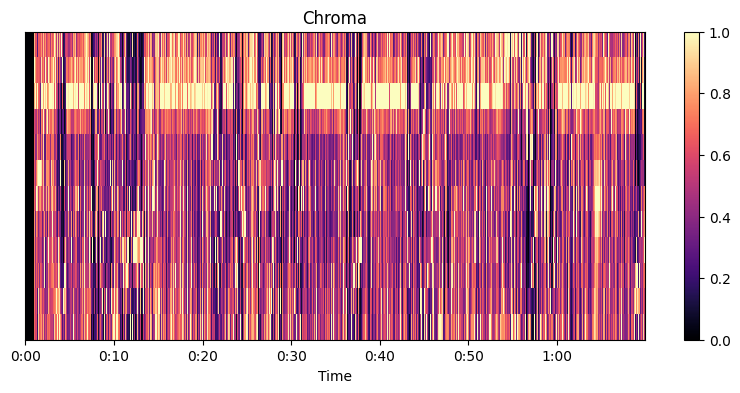

In [8]:
# Extracting chroma stft
chroma = librosa.feature.chroma_stft(y=y_ad, sr=sr_ad, hop_length=hop_length_ad)

# Display Chroma
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time', sr=sr_ad, hop_length=hop_length_ad)
plt.colorbar()
plt.title('Chroma')
plt.show()

2. For a controls patient (Non-Dementia)

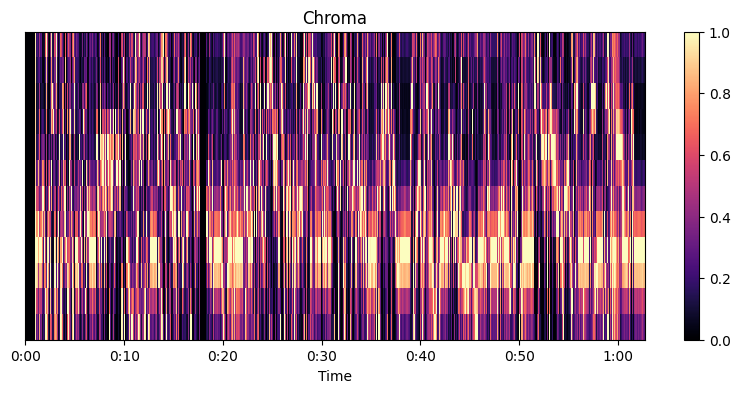

In [9]:
# Extracting chroma stft
chroma = librosa.feature.chroma_stft(y=y_cn, sr=sr_cn, hop_length=hop_length_cn)

# Display Chroma
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time', sr=sr_cn, hop_length=hop_length_cn)
plt.colorbar()
plt.title('Chroma')
plt.show()

#### Spectral Centroid feature

-- The spectral centroid is a measure used in digital signal processing to characterise a spectrum.

-- It indicates where the center of mass of the spectrum is located. Perceptually, it has a robust connection with the impression of brightness of a sound.

-- It is calculated as the weighted mean of the frequencies present in the signal, determined using a Fourier transform, with their magnitudes as the weights

1. For a person with Dementia

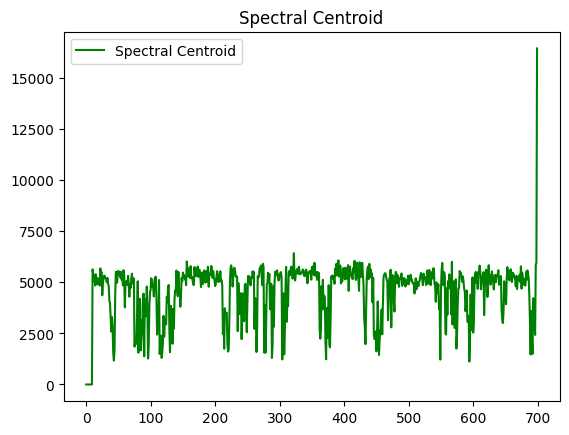

In [10]:
# Extracting spectral centroid
centroid = librosa.feature.spectral_centroid(y=y_ad, sr=sr_ad, hop_length=hop_length_ad)[0]

plt.plot(centroid, label='Spectral Centroid', color='green')
plt.title('Spectral Centroid')
plt.legend()
plt.show()

2. For a controls patient (Non-Dementia)

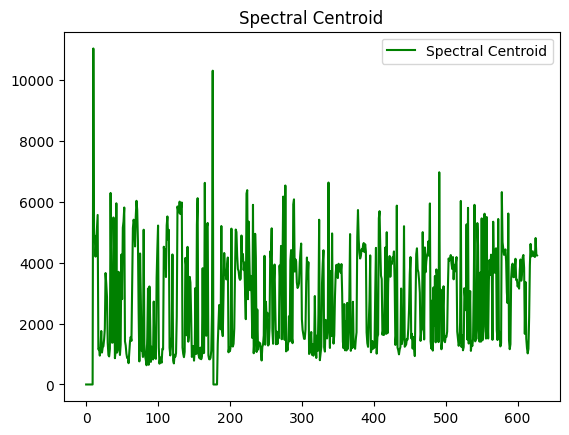

In [11]:
# Extracting spectral centroid
centroid = librosa.feature.spectral_centroid(y=y_cn, sr=sr_cn, hop_length=hop_length_cn)[0]

plt.plot(centroid, label='Spectral Centroid', color='green')
plt.title('Spectral Centroid')
plt.legend()
plt.show()

#### Spectral Bandwidth feature

-- Signals oscillate about a point so if the point is the centroid of the signal then the sum of maximum deviation of the signal on both sides of the point can be considered as the bandwidth of the signal at that time frame. 

1. For a person with Dementia

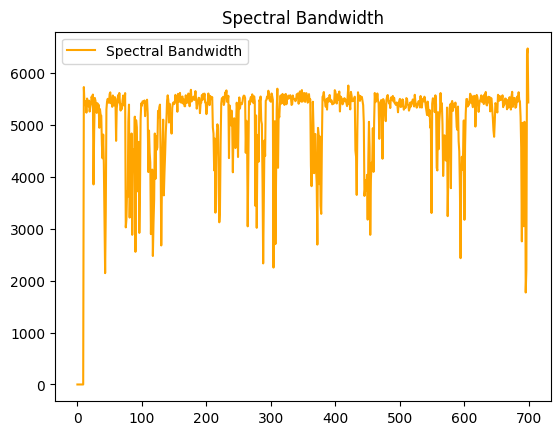

In [12]:
# Extracting Spectral Bandwidth
bandwidth = librosa.feature.spectral_bandwidth(y=y_ad, sr=sr_ad, hop_length=hop_length_ad)[0]

plt.plot(bandwidth, label='Spectral Bandwidth', color='orange')
plt.title('Spectral Bandwidth')
plt.legend()
plt.show()

2. For a controls patient (Non-Dementia)

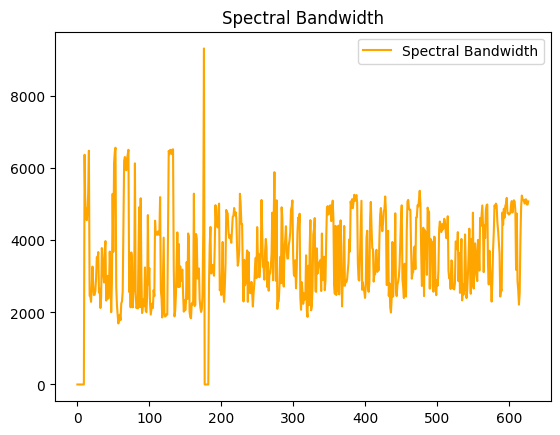

In [13]:
# Extracting spectral bandwidth
bandwidth = librosa.feature.spectral_bandwidth(y=y_cn, sr=sr_cn, hop_length=hop_length_cn)[0]

plt.plot(bandwidth, label='Spectral Bandwidth', color='orange')
plt.title('Spectral Bandwidth')
plt.legend()
plt.show()

#### Spectral Rolloff feature

-- It is the frequency below which a specified percentage of the total spectral energy (default 85%) lies.

1. For a person with Dementia

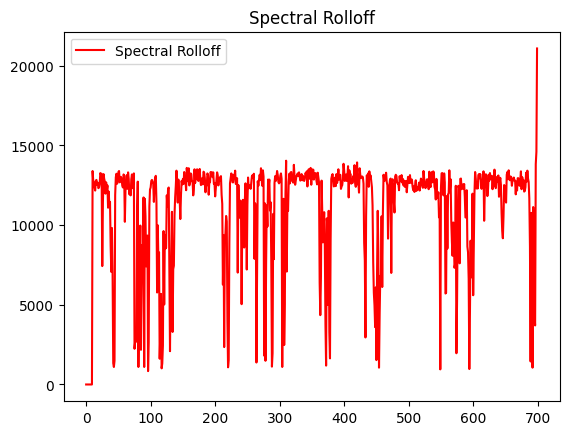

In [14]:
# Extracting spectral rolloff
rolloff = librosa.feature.spectral_rolloff(y=y_ad, sr=sr_ad, hop_length=hop_length_ad)[0]

plt.plot(rolloff, label='Spectral Rolloff', color='red')
plt.title('Spectral Rolloff')
plt.legend()
plt.show()

2. For a controls patient (Non-Dementia)

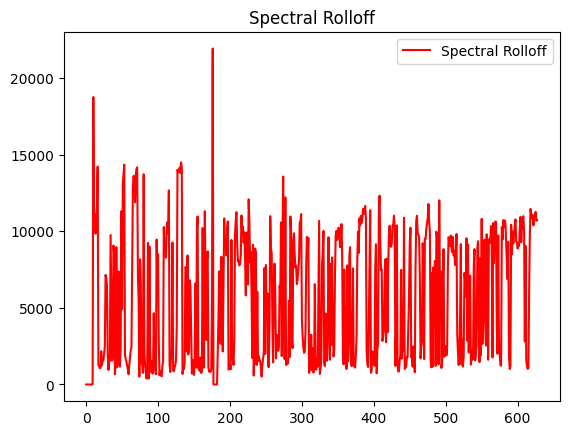

In [15]:
# Extracting spectral rolloff
rolloff = librosa.feature.spectral_rolloff(y=y_cn, sr=sr_cn, hop_length=hop_length_cn)[0]

plt.plot(rolloff, label='Spectral Rolloff', color='red')
plt.title('Spectral Rolloff')
plt.legend()
plt.show()

#### Spectral Contrast

1. For a person with Dementia

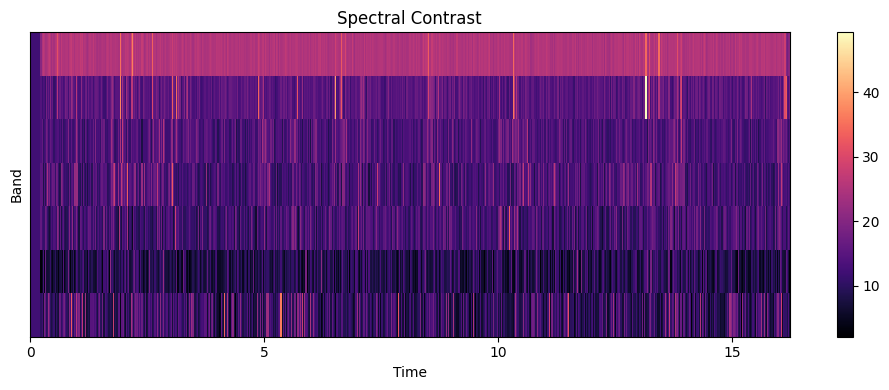

In [16]:
# Extract spectral contrast
spectral_contrast_ad = librosa.feature.spectral_contrast(y=y_ad, sr=sr_ad, hop_length=hop_length_ad)

# Plotting spectral contrast of the audio wave
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectral_contrast_ad, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.xlabel('Time')
plt.ylabel('Band')
plt.tight_layout()
plt.show()

2. For a controls patient (Non-Dementia)

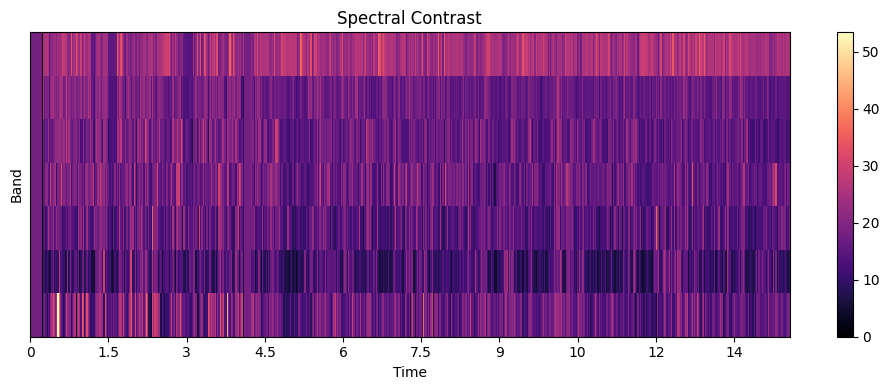

In [17]:
# Extract spectral contrast
spectral_contrast_cn = librosa.feature.spectral_contrast(y=y_cn, sr=sr_cn, hop_length=hop_length_cn)

# Plotting spectral contrast of the audio wave
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectral_contrast_cn, x_axis='time')
plt.colorbar()
plt.title('Spectral Contrast')
plt.xlabel('Time')
plt.ylabel('Band')
plt.tight_layout()
plt.show()

#### Entropy

1. For a person with Dementia

In [18]:
# Extract entropy
entropy_ad = librosa.feature.spectral_flatness(y=y_ad, hop_length=hop_length_ad)

print(entropy_ad.shape)

(1, 700)


2. For a controls patient (Non-Dementia)

In [19]:
# Extract entropy
entropy_cn = librosa.feature.spectral_flatness(y=y_cn, hop_length=hop_length_cn)

print(entropy_cn.shape)

(1, 628)


#### Zero-crossing rate

-- It provides information about the number of times the signal crosses the horizontal axis. The amplitude value of the consecutive samples is compared for the differences in signs of the amplitude values.

1. For a person with Dementia

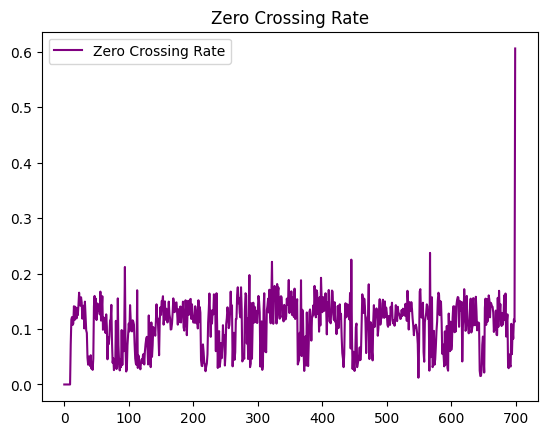

In [20]:
# Extracting zero crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(y=y_ad, hop_length=hop_length_ad)[0]

plt.plot(zero_crossings, label='Zero Crossing Rate', color='purple')
plt.title('Zero Crossing Rate')
plt.legend()
plt.show()

2. For a controls patient (Non-Dementia)

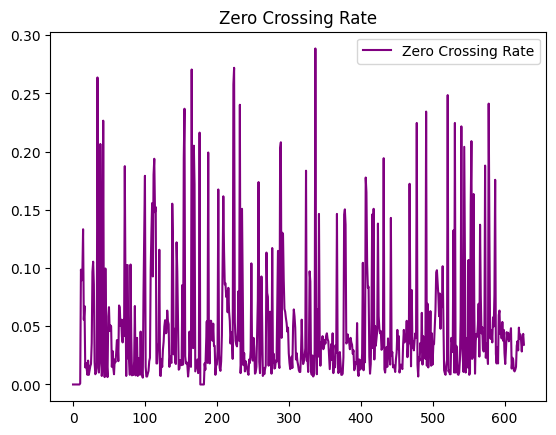

In [21]:
# Extracting zero crossing rate
zero_crossings = librosa.feature.zero_crossing_rate(y=y_cn, hop_length=hop_length_cn)[0]

plt.plot(zero_crossings, label='Zero Crossing Rate', color='purple')
plt.title('Zero Crossing Rate')
plt.legend()
plt.show()

#### RMS Energy

-- RMS is a measurement of how much continuous power an audio signal produces.

-- This means that RMS tells us how loud sound is on average over time.

1. For a person with Dementia

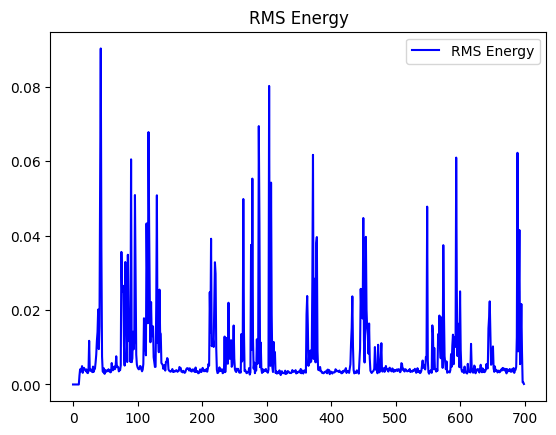

In [22]:
# Extracting rms energy
rms = librosa.feature.rms(y=y_ad, hop_length=hop_length_ad)[0]

plt.plot(rms, label='RMS Energy', color='blue')
plt.title('RMS Energy')
plt.legend()
plt.show()

2. For a controls patient (Non-Dementia)

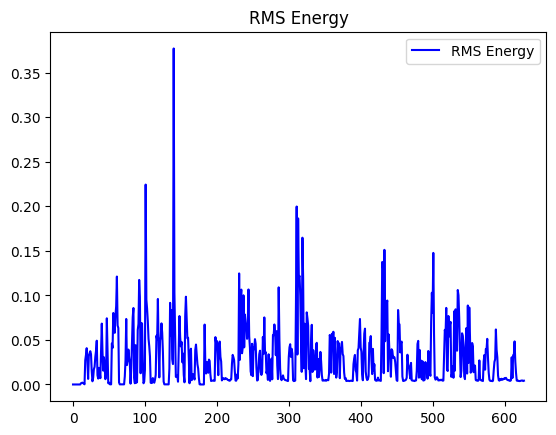

In [23]:
# Extracting rms energy
rms = librosa.feature.rms(y=y_cn, hop_length=hop_length_cn)[0]

plt.plot(rms, label='RMS Energy', color='blue')
plt.title('RMS Energy')
plt.legend()
plt.show()

#### Pitch (Fundamental Frequency)

1. For a person with Dementia

In [24]:
# Extract fundamental frequency (pitch)
f0, _ = pw.harvest(y_ad, sr_ad)
pitch = np.mean(f0)

print(pitch)

31.260772455171654


2. For a controls patient (Non-Dementia)

In [25]:
# Extract fundamental frequency
f0, _ = pw.harvest(y_cn, sr_cn)
pitch = np.mean(f0)

print(pitch)

139.01854126492813


#### Harmonics-to-Noise ratio

1. For a person with Dementia

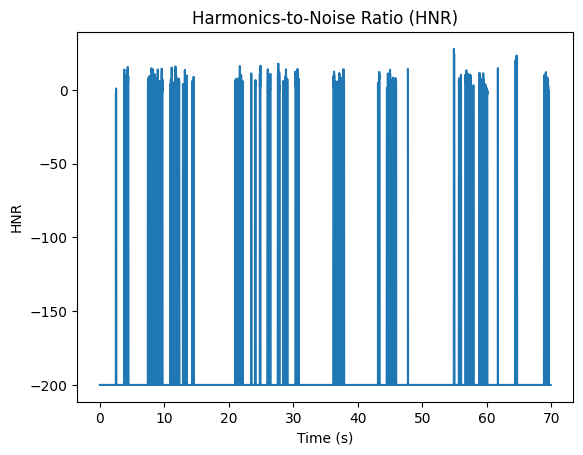

In [26]:
# Read audio file as a Parselmouth object
sound_ad = parselmouth.Sound(audio_file_ad)

# Extract HNR
hnr = sound_ad.to_harmonicity()

# Get times
times = hnr.xs()

# Get HNR values
hnr_values = hnr.values.T

# Plot HNR
plt.plot(times, hnr_values)
plt.xlabel('Time (s)')
plt.ylabel('HNR')
plt.title('Harmonics-to-Noise Ratio (HNR)')
plt.show()

2. For a controls patient (Non-Dementia)

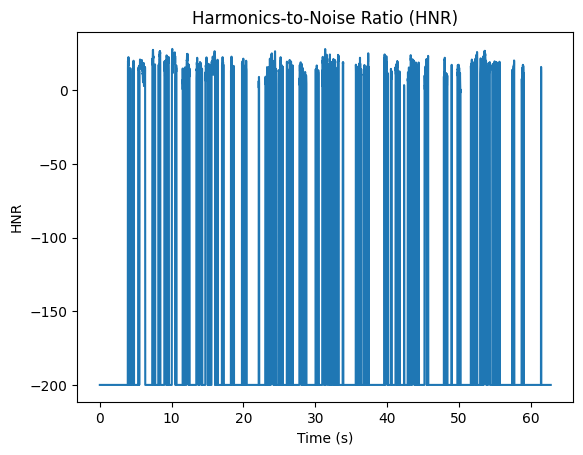

In [27]:
# Read audio file as a Parselmouth object
sound_cn = parselmouth.Sound(audio_file_cn)

# Extract HNR
hnr = sound_cn.to_harmonicity()

# Get times
times = hnr.xs()

# Get HNR values
hnr_values = hnr.values.T

# Plot HNR
plt.plot(times, hnr_values)
plt.xlabel('Time (s)')
plt.ylabel('HNR')
plt.title('Harmonics-to-Noise Ratio (HNR)')
plt.show()

#### Calculating the Signal-to-Noise ratio (based on amplitude)

In [4]:
# Function to calculate SNR using Amplitude
def calculate_snr(y):

    # Estimate noise threshold
    loudness_threshold = np.percentile(np.abs(y), 10)
    # print(loudness_threshold)

    # Estimate noise power
    noise_indices = np.where(np.abs(y) <= loudness_threshold)[0]
    noise_power = np.mean(np.square(np.abs(y[noise_indices])))
    # print(noise_power)

    # Estimate signal power
    signal_indices = np.where(np.abs(y) > loudness_threshold)[0]
    signal_power = np.mean(np.square(np.abs(y[signal_indices])))
    # print(signal_power)

    # print(f'Loudness threshold: {loudness_threshold}, Noise power: {noise_power}, Signal power: {signal_power}')

    snr = signal_power / noise_power

    return snr


1. For a person with Dementia

In [67]:
print(f'SNR for a person with Dementia : {calculate_snr(y_ad)}')

SNR for a person with Dementia : 37545.1484375


2. For a controls patient (Non-Dementia)

In [68]:
print(f'SNR for a controls patient is : {calculate_snr(y_cn)}')

SNR for a controls patient is : 51305.625


#### Calculating the number of words

In [13]:
def calculate_words_from_audio(audio_file_path):

    model = Model(model_path="vosk-transcription-models\\vosk-model-en-us-0.22")

    # Opening the audio file
    audio_file = wave.open(audio_file_path, 'rb')

    # Set the parameters for the recognizer
    rec = KaldiRecognizer(model, audio_file.getframerate())

    # Initialize an empty list to store transcriptions
    transcriptions = []

    # Process the audio in chunks
    while True:
        data = audio_file.readframes(4000)
        if len(data) == 0:
            break
        if rec.AcceptWaveform(data):
            result = json.loads(rec.Result())
            transcriptions.append(result["text"])

    # Get the final transcription
    result = json.loads(rec.FinalResult())
    transcriptions.append(result["text"])

    # Combine all transcriptions into a single string
    final_transcription = " ".join(transcriptions)

    # Calculate the number of words in the transcription
    words =len(final_transcription.split(" "))

    return words

#### Acoustic Feature Extraction

In [6]:
def extract_features(audio_file):

    # Loading the audio file
    y, sr = librosa.load(audio_file, sr=None, dtype=np.float64)

    # Converting the audio file to mono
    y = librosa.to_mono(y)

    window_size = 0.1
    hop_length = int(window_size * sr)

    # Calculate features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)
    mfccs_delta = librosa.feature.delta(mfccs)
    mfccs_delta_delta = librosa.feature.delta(mfccs, order=2)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, hop_length=hop_length)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=hop_length)
    entropy = librosa.feature.spectral_flatness(y=y, hop_length=hop_length)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y, hop_length=hop_length)
    rms_energy = librosa.feature.rms(y=y, hop_length=hop_length)
    f0, _ = pw.harvest(y, sr)
    pitch = np.mean(f0)
    snr = calculate_snr(y)
    duration = librosa.get_duration(y=y, sr=sr)
    words = calculate_words_from_audio(audio_file)

    # Flatten features for simplicity
    flat_features = {
        'MFCCs_mean': np.mean(mfccs),
        'MFCCs_std': np.std(mfccs),
        'MFCCs_min': np.min(mfccs),
        'MFCCs_max': np.max(mfccs),
        'MFCCs_Q1': np.percentile(mfccs, 25),
        'MFCCs_Q2': np.percentile(mfccs, 50),
        'MFCCs_Q3': np.percentile(mfccs, 75),

        'MFCCs_d1_mean': np.mean(mfccs_delta),
        'MFCCs_d1_std': np.std(mfccs_delta),
        'MFCCs_d1_min': np.min(mfccs_delta),
        'MFCCs_d1_max': np.max(mfccs_delta),
        'MFCCS_d1_Q1': np.percentile(mfccs_delta, 25),
        'MFCCS_d1_Q2': np.percentile(mfccs_delta, 50),
        'MFCCS_d1_Q3': np.percentile(mfccs_delta, 75),

        'MFCCs_d2_mean': np.mean(mfccs_delta_delta),
        'MFCCs_d2_std': np.std(mfccs_delta_delta),
        'MFCCs_d2_min': np.min(mfccs_delta_delta),
        'MFCCs_d2_max': np.max(mfccs_delta_delta),
        'MFCCS_d2_Q1': np.percentile(mfccs_delta_delta, 25),
        'MFCCS_d2_Q2': np.percentile(mfccs_delta_delta, 50),
        'MFCCS_d2_Q3': np.percentile(mfccs_delta_delta, 75),

        'Chroma_mean': np.mean(chroma),
        'Chroma_std': np.std(chroma),
        'Chroma_Q1': np.percentile(chroma, 25),
        'Chroma_Q2': np.percentile(chroma, 50),
        'Chroma_Q3': np.percentile(chroma, 75),

        'Spectral_Centroid_mean': np.mean(spectral_centroid),
        'Spectral_Centroid_std': np.std(spectral_centroid),
        'Spectral_Centroid_max': np.max(spectral_centroid),
        'Spectral_Centroid_Q1': np.percentile(spectral_centroid, 25),
        'Spectral_Centroid_Q2': np.percentile(spectral_centroid, 50),
        'Spectral_Centroid_Q3': np.percentile(spectral_centroid, 75),

        'Spectral_Bandwidth_mean': np.mean(spectral_bandwidth),
        'Spectral_Bandwidth_std': np.std(spectral_bandwidth),
        'Spectral_Bandwidth_max': np.max(spectral_bandwidth),
        'Spectral_Bandwidth_Q1': np.percentile(spectral_bandwidth, 25),
        'Spectral_Bandwidth_Q2': np.percentile(spectral_bandwidth, 50),
        'Spectral_Bandwidth_Q3': np.percentile(spectral_bandwidth, 75),

        'Spectral_Rolloff_mean': np.mean(spectral_rolloff),
        'Spectral_Rolloff_std': np.std(spectral_rolloff),
        'Spectral_Rolloff_max': np.max(spectral_rolloff),
        'Spectral_Rolloff_Q1': np.percentile(spectral_rolloff, 25),
        'Spectral_Rolloff_Q2': np.percentile(spectral_rolloff, 50),
        'Spectral_Rolloff_Q3': np.percentile(spectral_rolloff, 75),

        'Spectral_Contrast_mean': np.mean(spectral_contrast),
        'Spectral_Contrast_std': np.std(spectral_contrast),
        'Spectral_Contrast_max': np.max(spectral_contrast),
        'Spectral_Contrast_Q1': np.percentile(spectral_contrast, 25),
        'Spectral_Contrast_Q2': np.percentile(spectral_contrast, 50),
        'Spectral_Contrast_Q3': np.percentile(spectral_contrast, 75),

        'Entropy_mean': np.mean(entropy),
        'Entropy_std': np.std(entropy),
        'Entropy_min': np.min(entropy),
        'Entropy_Q1': np.percentile(entropy, 25),
        'Entropy_Q2': np.percentile(entropy, 50),
        'Entropy_Q3': np.percentile(entropy, 75),

        'Zero_Crossing_Rate_mean': np.mean(zero_crossing_rate),
        'Zero_Crossing_Rate_std': np.std(zero_crossing_rate),
        'Zero_Crossing_Rate_max': np.max(zero_crossing_rate),
        'Zero_Crossing_Rate_Q1': np.percentile(zero_crossing_rate, 25),
        'Zero_Crossing_Rate_Q2': np.percentile(zero_crossing_rate, 50),
        'Zero_Crossing_Rate_Q3': np.percentile(zero_crossing_rate, 75),

        'RMS_Energy_mean': np.mean(rms_energy),
        'RMS_Energy_std': np.std(rms_energy),
        'RMS_Energy_max': np.max(rms_energy),
        'RMS_Energy_Q1': np.percentile(rms_energy, 25),
        'RMS_Energy_Q2': np.percentile(rms_energy, 50),
        'RMS_Energy_Q3': np.percentile(rms_energy, 75),
        
        'SNR': snr,

        'Pitch': pitch,

        'Duration': duration,

        'Words': words
    }

    return flat_features

In [7]:
def calculate_hnr(audio_file):
    
    # Loading the audio file using ParselMouth
    sound = parselmouth.Sound(audio_file)

    # Extract HNR
    hnr = sound.to_harmonicity()

    # Return the HNR Values
    return hnr.values

In [8]:
def append_hnr_features(features, hnr_values):

    # Append HNR features to the existing features
    features['HNR_mean'] = np.mean(hnr_values)
    features['HNR_std'] = np.std(hnr_values)
    features['HNR_max'] = np.max(hnr_values)

    return features

In [9]:
mmse_df = pd.read_csv(train_mmse)

In [20]:
# List to store feature dictionaries
features_list = []

# Process audio files in the AD directory
for filename in os.listdir(final_segmented_train_ad):
    audio_file_path = os.path.join(final_segmented_train_ad, filename)

    # Extract features from the audio file
    features = extract_features(audio_file_path)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_file_path)

    # Add the HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store filename and diagnosis from MMSE dataframe
    features['adressfname'] = filename[:-4]
    features['dx'] = 'ad'

    # Storing the MMSE Score from the MMSE dataframe
    mmse = mmse_df[mmse_df['adressfname'] == filename[:-4]]['mmse'].values[0]
    features['mmse'] = mmse
    features_list.append(features)

# Process audio files in the CN directory
for filename in os.listdir(final_segmented_train_cn):
    audio_file_path = os.path.join(final_segmented_train_cn, filename)

    # Extract features from the audio file
    features = extract_features(audio_file_path)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_file_path)

    # Add the HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store filename and diagnosis from MMSE dataframe
    features['adressfname'] = filename[:-4]
    features['dx'] = 'cn'

    # Storing the MMSE Score from the MMSE dataframe
    mmse = mmse_df[mmse_df['adressfname'] == filename[:-4]]['mmse'].values[0]
    features['mmse'] = mmse
    features_list.append(features)

# Create a DataFrame from the list of feature dictionaries
df = pd.DataFrame(features_list)

In [21]:
# Store this dataframe in a csv file
df.to_csv(os.path.join(train, 'adresso-features-train.csv'), index=False)

In [14]:
# List to store test feature dictionaries
test_features_list = []

# Process audio files in the test directory
for filename in os.listdir(final_segmented_test):
    audio_file_path = os.path.join(final_segmented_test, filename)

    # Extract features from the test audio file
    features = extract_features(audio_file_path)

    # Extract the HNR values from the test audio file
    hnr_values = calculate_hnr(audio_file_path)

    # Add the HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store filename
    features['adressfname'] = filename[:-4]
    test_features_list.append(features)

# Create a DataFrame from the list of feature dictionaries
test_df = pd.DataFrame(test_features_list)

In [15]:
test_df.to_csv(os.path.join(test, 'adresso-features-test.csv'), index=False)

#### Using OpenL3

In [5]:
# loading the audio file
audio_file_ad = final_segmented_train_ad + 'adrso024.wav'
audio, sr = sf.read(audio_file_ad)

In [6]:
# Extract embeddings using OpenL3
embedding, _ = openl3.get_audio_embedding(audio, sr)



70/70 [==============================] - 306s 4s/step


In [7]:
embedding.shape

(2239, 6144)

In [8]:
aggregated_embedding = np.mean(embedding, axis=0)
aggregated_embedding.shape

(6144,)

We can find PCA components after aggregated embedding.

In [5]:
# Function to compute OpenL3 embeddings for audio files
def compute_openl3_embedding(audio_file):

    # Read audio file
    audio, sr = sf.read(audio_file)
    # Compute OpenL3 embeddings for the audio file
    audio_embedding, _ = openl3.get_audio_embedding(audio, sr=sr, center=True)

    # Compute aggregated embeddings
    aggregated_embedding = np.mean(audio_embedding, axis=0)
    
    return aggregated_embedding

In [6]:
# Function to perform PCA on aggregated embeddings
def apply_pca(aggregated_embeddings, num_components):
    # Standardize the aggregated embeddings
    scaler = StandardScaler()
    standardized_embeddings = scaler.fit_transform(aggregated_embeddings)
    
    # Apply PCA
    pca = PCA(n_components=num_components)
    pca.fit(standardized_embeddings)
    pca_embeddings = pca.transform(standardized_embeddings)
    return pca_embeddings

In [7]:
# List to store aggregated embeddings and filenames
aggregated_embeddings_list = []
filenames_list = []

In [8]:
# Process audio files in the AD directory
ad_audio_files = [os.path.join(final_segmented_train_ad, filename) for filename in os.listdir(final_segmented_train_ad)]

# Compute OpenL3 embeddings for audio files
ad_aggregated_embeddings = [compute_openl3_embedding(file) for file in ad_audio_files]
aggregated_embeddings_list.extend(ad_aggregated_embeddings)

# Storing the filename
filenames_list.extend([os.path.basename(file)[:-4] for file in ad_audio_files])



22/22 [==============================] - 88s 4s/step


In [9]:
# Process audio files in the CN directory
cn_audio_files = [os.path.join(final_segmented_train_cn, filename) for filename in os.listdir(final_segmented_train_cn)]

# Compute OpenL3 embeddings for audio files
cn_embeddings = [compute_openl3_embedding(file) for file in cn_audio_files]
aggregated_embeddings_list.extend(cn_embeddings)

# Storing the filename
filenames_list.extend([os.path.basename(file)[:-4] for file in cn_audio_files])

18/18 [==============================] - 77s 4s/step


In [10]:
# Apply PCA on aggregated embeddings
num_components = 71
pca_embeddings = apply_pca(aggregated_embeddings_list, num_components)

In [11]:
# Convert PCA embeddings to DataFrame
pca_df = pd.DataFrame(pca_embeddings, columns=[f'PCA_{i+1}' for i in range(num_components)])

# Add filenames as a column in the DataFrame
pca_df['adressfname'] = filenames_list

In [12]:
pca_df.to_csv(os.path.join(train, 'adresso-openl3-pca-embeddings-train.csv'), index=False)

In [15]:
# list to store embeddings of test audio files
aggregated_test_embeddings = []
test_filenames = []

In [16]:
# process audio files in the test directory
test_audio_files = [os.path.join(final_segmented_test, filename) for filename in os.listdir(final_segmented_test)]

# Compute OpenL3 embeddings for audio files
test_embeddings = [compute_openl3_embedding(file) for file in test_audio_files]
aggregated_test_embeddings.extend(test_embeddings)

# Storing the filename
test_filenames.extend([os.path.basename(file)[:-4] for file in test_audio_files])

17/17 [==============================] - 72s 4s/step


In [22]:
# Apply PCA on test aggregated embeddings
num_components = 71
pca_embeddings_test = apply_pca(aggregated_test_embeddings, num_components)

In [ ]:
# Convert PCA embeddings to DataFrame
pca_test_df = pd.DataFrame(pca_embeddings_test, columns=[f'PCA_{i+1}' for i in range(num_components)])

# Add filenames as a column in the DataFrame
pca_test_df['adressfname'] = test_filenames

In [ ]:
pca_test_df.to_csv(os.path.join(test, 'adresso-openl3-pca-embeddings-test.csv'), index=False)

#### Spectrogram Extraction

In [17]:
def generate_spectrogram_image(audio_dir, output_dir, class_name):

    for filename in os.listdir(audio_dir):
        audio_file = os.path.join(audio_dir, filename)
        audio, sample_rate = librosa.load(audio_file, sr=None, mono=False)

        # convert stereo audio to mono
        audio_mono = librosa.to_mono(audio)

        # compute spectrogram
        f, t, Sxx = spectrogram(audio_mono, sample_rate)

        # Ensuring the dimensions of Sxx match the dimensions of t and f
        assert Sxx.shape[1] == len(t) and Sxx.shape[0] == len(f), "Dimensions of Sxx do not match dimensions of t and f"

        # Plotting the spectrogram
        plt.figure(figsize=(2.44, 2.44))  # Set figure size to match 224x224 pixels
        plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
        plt.ylim(0, sample_rate / 2)
        plt.axis('off')
        plt.tight_layout()

        # Save spectrogram as image
        image_path = os.path.join(output_dir, f'{class_name}_{filename[:-4]}.jpg')
        plt.savefig(image_path)
        plt.close()

In [19]:
generate_spectrogram_image(final_segmented_train_ad, spectrogram_train_ad, 'ad')
generate_spectrogram_image(final_segmented_train_cn, spectrogram_train_cn, 'cn')

In [ ]:
def generate_test_spectrogram_image(audio_dir, output_dir):

    for filename in os.listdir(audio_dir):
        audio_file = os.path.join(audio_dir, filename)
        audio, sample_rate = librosa.load(audio_file, sr=None, mono=False)

        # convert stereo audio to mono
        audio_mono = librosa.to_mono(audio)

        # compute spectrogram
        f, t, Sxx = spectrogram(audio_mono, sample_rate)

        # ensuring the dimensions of Sxx match the dimensions of t and f
        assert Sxx.shape[1] == len(t) and Sxx.shape[0] == len(f), "Dimensions of Sxx do not match dimensions of t and f"

        # Plotting the spectrogram
        plt.figure(figsize=(2.44, 2.44))
        plt.pcolormesh(t, f, 10*np.log10(Sxx), shading='gouraud')
        plt.ylim(0, sample_rate/2)
        plt.axis('off')
        plt.tight_layout()

        # save the spectrogram as image
        image_path = os.path.join(output_dir, f'{filename[:-4]}.jpg')
        plt.savefig(image_path)
        plt.close()

In [ ]:
generate_test_spectrogram_image(final_segmented_test, spectrogram_test)

#### Data Augmentation for Acoustic features

Performing Data augmentation on acoustic features by the following techniques:

1. Pitch Shift

2. Dynamic Range Compression

3. Feature Manipulation

In [5]:
audio_file_ad = final_segmented_train_ad + 'adrso032.wav'
audio_file_cn = final_segmented_train_cn + 'adrso022.wav'

audio, sr = librosa.load(audio_file_ad, sr=None)

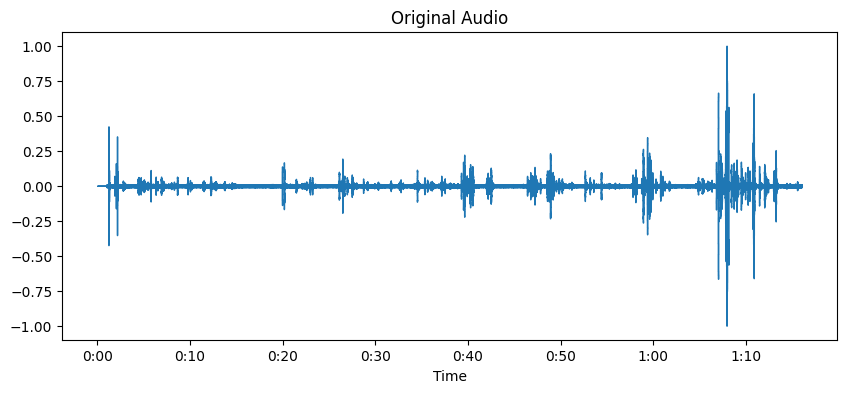

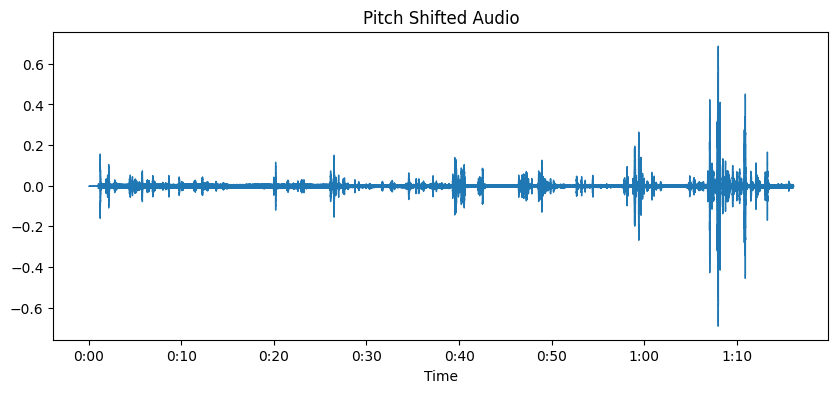

In [10]:
audio_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=2)

# Plot the original audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Original Audio')
plt.show()

# Plot the shifted audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_shifted, sr=sr)
plt.title('Pitch Shifted Audio')
plt.show()

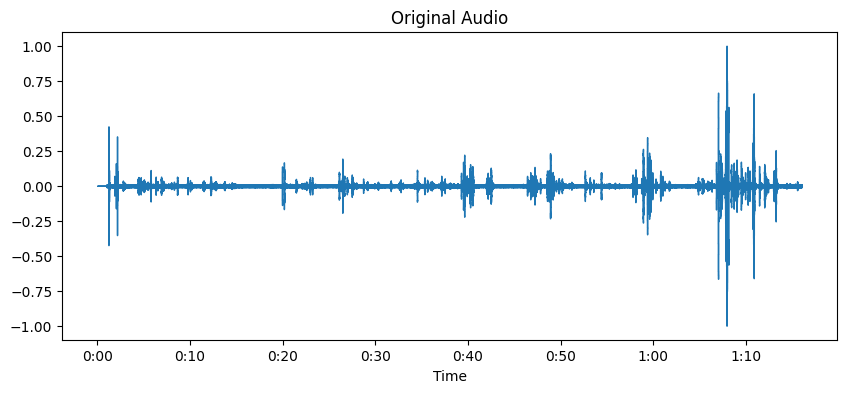

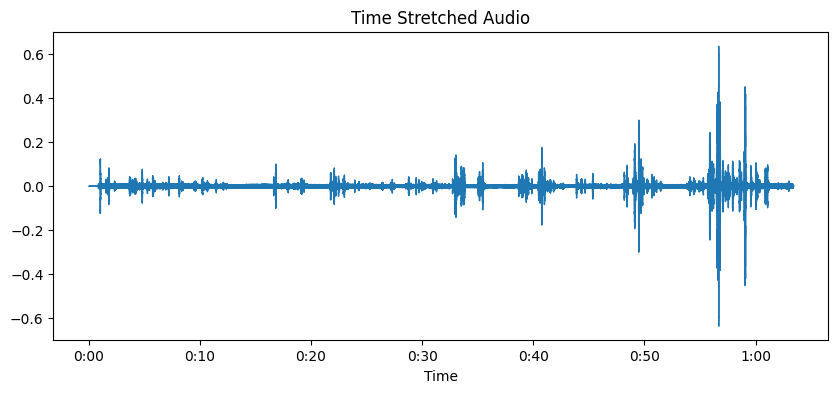

In [13]:
audio_stretched = librosa.effects.time_stretch(audio, rate=1.2)

# Plot the original audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Original Audio')
plt.show()

# Plot the stretched audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio_stretched, sr=sr)
plt.title('Time Stretched Audio')
plt.show()

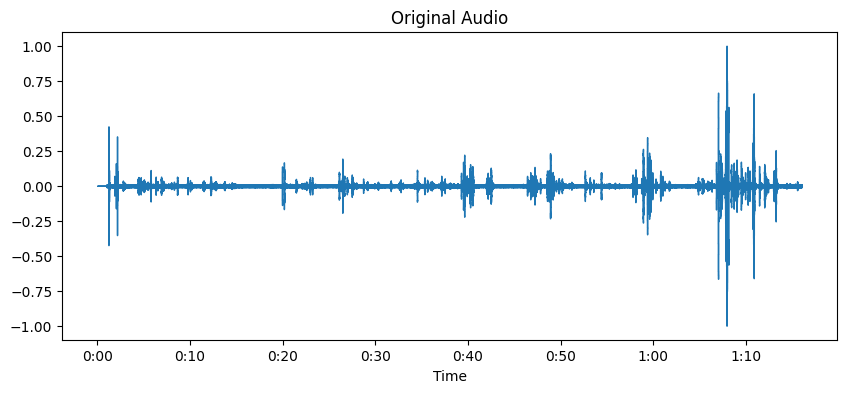

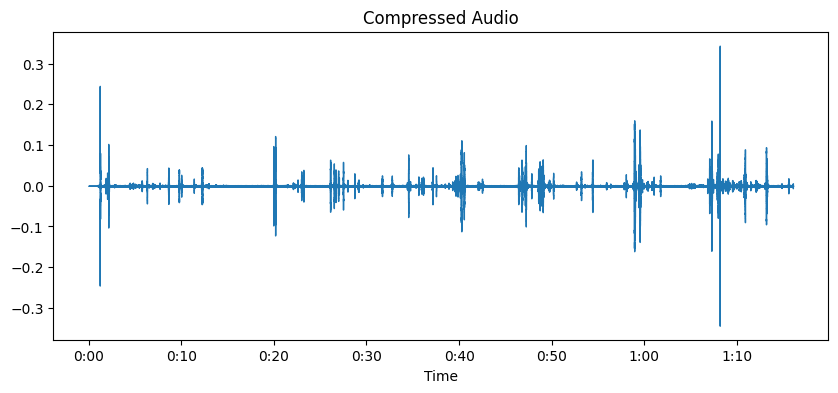

In [14]:
compressed_audio = librosa.effects.preemphasis(audio)

# Plot the original audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Original Audio')
plt.show()

# Plot the compressed audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(compressed_audio, sr=sr)
plt.title('Compressed Audio')
plt.show()

Updated acoustic feature extraction function with data augmentation included.

In [4]:
# Function to apply feature manipulation
def feature_manipulation(features):
    manipulated_feature_dict = {}
    for feature_name, feature_vector in features.items():
        # If key is adressfname or dx or mmse, then skip it
        if feature_name == 'adressfname' or feature_name == 'dx' or feature_name == 'mmse':
            continue
        
        # Apply small perturbations or transformations to the feature vector
        manipulated_feature_vector = feature_vector + np.random.normal(loc=0, scale=0.5, size=feature_vector.shape)
        manipulated_feature_dict[feature_name] = manipulated_feature_vector
        
    return manipulated_feature_dict

In [24]:
def time_domain_transformation(audio):
    # Apply time domain transformations
    shift = np.random.randint(-500, 500)
    return np.roll(audio, shift)

In [25]:
def frequency_domain_transformation(audio):
    # Apply frequency domain transformations
    noise = 0.01 * np.random.randn(len(audio))
    return audio + noise

In [5]:
# Function to calculate SNR using Amplitude
def calculate_snr(y):
    # Estimate noise threshold
    loudness_threshold = np.percentile(np.abs(y), 10)
    # print(loudness_threshold)

    # Estimate noise power
    noise_indices = np.where(np.abs(y) <= loudness_threshold)[0]
    noise_power = np.mean(np.square(np.abs(y[noise_indices])))
    # print(noise_power)

    # Estimate signal power
    signal_indices = np.where(np.abs(y) > loudness_threshold)[0]
    signal_power = np.mean(np.square(np.abs(y[signal_indices])))
    # print(signal_power)

    # print(f'Loudness threshold: {loudness_threshold}, Noise power: {noise_power}, Signal power: {signal_power}')

    snr = signal_power / noise_power

    return snr


In [28]:
def extract_features(y, sr=None):

    window_size = 0.1
    hop_length = int(window_size * sr)

    # Calculate features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=hop_length)
    mfccs_delta = librosa.feature.delta(mfccs)
    mfccs_delta_delta = librosa.feature.delta(mfccs, order=2)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr, hop_length=hop_length)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=hop_length)
    entropy = librosa.feature.spectral_flatness(y=y, hop_length=hop_length)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y, hop_length=hop_length)
    rms_energy = librosa.feature.rms(y=y, hop_length=hop_length)
    f0, _ = pw.harvest(y, sr)
    pitch = np.mean(f0)
    snr = calculate_snr(y)
    duration = librosa.get_duration(y=y, sr=sr)

    # Flatten features for simplicity
    flat_features = {
        'MFCCs_mean': np.mean(mfccs),
        'MFCCs_std': np.std(mfccs),
        'MFCCs_min': np.min(mfccs),
        'MFCCs_max': np.max(mfccs),
        'MFCCs_Q1': np.percentile(mfccs, 25),
        'MFCCs_Q2': np.percentile(mfccs, 50),
        'MFCCs_Q3': np.percentile(mfccs, 75),

        'MFCCs_d1_mean': np.mean(mfccs_delta),
        'MFCCs_d1_std': np.std(mfccs_delta),
        'MFCCs_d1_min': np.min(mfccs_delta),
        'MFCCs_d1_max': np.max(mfccs_delta),
        'MFCCS_d1_Q1': np.percentile(mfccs_delta, 25),
        'MFCCS_d1_Q2': np.percentile(mfccs_delta, 50),
        'MFCCS_d1_Q3': np.percentile(mfccs_delta, 75),

        'MFCCs_d2_mean': np.mean(mfccs_delta_delta),
        'MFCCs_d2_std': np.std(mfccs_delta_delta),
        'MFCCs_d2_min': np.min(mfccs_delta_delta),
        'MFCCs_d2_max': np.max(mfccs_delta_delta),
        'MFCCS_d2_Q1': np.percentile(mfccs_delta_delta, 25),
        'MFCCS_d2_Q2': np.percentile(mfccs_delta_delta, 50),
        'MFCCS_d2_Q3': np.percentile(mfccs_delta_delta, 75),

        'Chroma_mean': np.mean(chroma),
        'Chroma_std': np.std(chroma),
        'Chroma_Q1': np.percentile(chroma, 25),
        'Chroma_Q2': np.percentile(chroma, 50),
        'Chroma_Q3': np.percentile(chroma, 75),

        'Spectral_Centroid_mean': np.mean(spectral_centroid),
        'Spectral_Centroid_std': np.std(spectral_centroid),
        'Spectral_Centroid_max': np.max(spectral_centroid),
        'Spectral_Centroid_Q1': np.percentile(spectral_centroid, 25),
        'Spectral_Centroid_Q2': np.percentile(spectral_centroid, 50),
        'Spectral_Centroid_Q3': np.percentile(spectral_centroid, 75),

        'Spectral_Bandwidth_mean': np.mean(spectral_bandwidth),
        'Spectral_Bandwidth_std': np.std(spectral_bandwidth),
        'Spectral_Bandwidth_max': np.max(spectral_bandwidth),
        'Spectral_Bandwidth_Q1': np.percentile(spectral_bandwidth, 25),
        'Spectral_Bandwidth_Q2': np.percentile(spectral_bandwidth, 50),
        'Spectral_Bandwidth_Q3': np.percentile(spectral_bandwidth, 75),

        'Spectral_Rolloff_mean': np.mean(spectral_rolloff),
        'Spectral_Rolloff_std': np.std(spectral_rolloff),
        'Spectral_Rolloff_max': np.max(spectral_rolloff),
        'Spectral_Rolloff_Q1': np.percentile(spectral_rolloff, 25),
        'Spectral_Rolloff_Q2': np.percentile(spectral_rolloff, 50),
        'Spectral_Rolloff_Q3': np.percentile(spectral_rolloff, 75),

        'Spectral_Contrast_mean': np.mean(spectral_contrast),
        'Spectral_Contrast_std': np.std(spectral_contrast),
        'Spectral_Contrast_max': np.max(spectral_contrast),
        'Spectral_Contrast_Q1': np.percentile(spectral_contrast, 25),
        'Spectral_Contrast_Q2': np.percentile(spectral_contrast, 50),
        'Spectral_Contrast_Q3': np.percentile(spectral_contrast, 75),

        'Entropy_mean': np.mean(entropy),
        'Entropy_std': np.std(entropy),
        'Entropy_min': np.min(entropy),
        'Entropy_Q1': np.percentile(entropy, 25),
        'Entropy_Q2': np.percentile(entropy, 50),
        'Entropy_Q3': np.percentile(entropy, 75),

        'Zero_Crossing_Rate_mean': np.mean(zero_crossing_rate),
        'Zero_Crossing_Rate_std': np.std(zero_crossing_rate),
        'Zero_Crossing_Rate_max': np.max(zero_crossing_rate),
        'Zero_Crossing_Rate_Q1': np.percentile(zero_crossing_rate, 25),
        'Zero_Crossing_Rate_Q2': np.percentile(zero_crossing_rate, 50),
        'Zero_Crossing_Rate_Q3': np.percentile(zero_crossing_rate, 75),

        'RMS_Energy_mean': np.mean(rms_energy),
        'RMS_Energy_std': np.std(rms_energy),
        'RMS_Energy_max': np.max(rms_energy),
        'RMS_Energy_Q1': np.percentile(rms_energy, 25),
        'RMS_Energy_Q2': np.percentile(rms_energy, 50),
        'RMS_Energy_Q3': np.percentile(rms_energy, 75),
        
        'SNR': snr,

        'Pitch': pitch,

        'Duration': duration
    }

    return flat_features

In [7]:
mmse_df = pd.read_csv(train_mmse)

In [ ]:
# List to store feature dictionaries
features_list = []

# Process audio files in the AD directory
for filename in os.listdir(final_segmented_train_ad):
    # Extract features from original audio
    audio_file_path = os.path.join(final_segmented_train_ad, filename)
    y, sr = librosa.load(audio_file_path, sr=None, dtype=np.float64)
    y = librosa.to_mono(y)

    # Extract features from the audio file
    features = extract_features(y, sr)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_file_path)

    # Append HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename and diagnosis
    features['adressfname'] = filename[:-4]
    features['dx'] = 'ad'

    # Storing the MMSE Score from the MMSE dataframe
    mmse = mmse_df[mmse_df['adressfname'] == filename[:-4]]['mmse'].values[0]
    features['mmse'] = mmse
    features_list.append(features)

    # # Extract features from feature manipulation
    # manipulated_features = feature_manipulation(features)
    # manipulated_features['adressfname'] = filename[:-4] + '_manipulated'
    # manipulated_features['dx'] = 'ad'
    # manipulated_features['mmse'] = mmse
    # features_list.append(manipulated_features)

    # Extract features from pitch shifted audio
    audio_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    features = extract_features(audio_shifted, sr)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_shifted)

    # Append HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename, diagnosis and MMSE score
    features['adressfname'] = filename[:-4] + '_pitch_shifted'
    features['dx'] = 'ad'
    features['mmse'] = mmse
    features_list.append(features)

    # Extract features from time stretched audio
    audio_stretched = librosa.effects.time_stretch(y, rate=1.2)
    features = extract_features(audio_stretched, sr)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_stretched)

    # Append HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename, diagnosis and MMSE score
    features['adressfname'] = filename[:-4] + '_time_stretched'
    features['dx'] = 'ad'
    features['mmse'] = mmse
    features_list.append(features)

    # Extract features after time domain transformation
    audio_time_transform = time_domain_transformation(y)
    features = extract_features(audio_time_transform, sr)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_time_transform)

    # Append the HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename, diagnosis and MMSE score
    features['adressfname'] = filename[:-4] + '_time_transformed'
    features['dx'] = 'ad'
    features['mmse'] = mmse
    features_list.append(features)

    # Extract features after frequency domain transformation
    audio_freq_transform = frequency_domain_transformation(y)
    features = extract_features(audio_freq_transform, sr)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_freq_transform)

    # Append the HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename, diagnosis and MMSE score
    features['adressfname'] = filename[:-4] + '_freq_transformed'
    features['dx'] = 'ad'
    features['mmse'] = mmse
    features_list.append(features)
    

# Process audio files in the CN directory
for filename in os.listdir(final_segmented_train_cn):
    # Extract features from original audio
    audio_file_path = os.path.join(final_segmented_train_cn, filename)
    y, sr = librosa.load(audio_file_path, sr=None, dtype=np.float64)
    y = librosa.to_mono(y)

    # Extract feature from audio file
    features = extract_features(y, sr)

    # Extract HNR values from the audio file
    hnr_values = calculate_hnr(audio_file_path)

    # Append HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store filename and diagnosis
    features['adressfname'] = filename[:-4]
    features['dx'] = 'cn'

    # Storing the MMSE Score from the MMSE dataframe
    mmse = mmse_df[mmse_df['adressfname'] == filename[:-4]]['mmse'].values[0]
    features['mmse'] = mmse
    features_list.append(features)

    # # Extract features from feature manipulation
    # manipulated_features = feature_manipulation(features)
    # manipulated_features['adressfname'] = filename[:-4] + '_manipulated'
    # manipulated_features['dx'] = 'cn'
    # manipulated_features['mmse'] = mmse
    # features_list.append(manipulated_features)

    # Extract features from pitch shifted audio
    audio_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    features = extract_features(audio_shifted, sr)

    # Extract HNR values from the audio file
    hnr_values = calculate_hnr(audio_shifted)

    # Append HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename and diagnosis
    features['adressfname'] = filename[:-4] + '_pitch_shifted'
    features['dx'] = 'cn'
    features['mmse'] = mmse
    features_list.append(features)

    # Extract features from time stretched audio
    audio_stretched = librosa.effects.time_stretch(y, rate=1.2)
    features = extract_features(audio_stretched, sr)

    # Extract HNR values from the audio file
    hnr_values = calculate_hnr(audio_stretched)

    # Append HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename, diangosis and MMSE score
    features['adressfname'] = filename[:-4] + '_time_stretched'
    features['dx'] = 'cn'
    features['mmse'] = mmse
    features_list.append(features)

    # Extract features after time domain transformation
    audio_time_transform = time_domain_transformation(y)
    features = extract_features(audio_time_transform, sr)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_time_transform)

    # Append the HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename, diagnosis and MMSE score
    features['adressfname'] = filename[:-4] + '_time_transformed'
    features['dx'] = 'cn'
    features['mmse'] = mmse
    features_list.append(features)

    # Extract features after frequency domain transformation
    audio_freq_transform = frequency_domain_transformation(y)
    features = extract_features(audio_freq_transform, sr)

    # Extract the HNR values from the audio file
    hnr_values = calculate_hnr(audio_freq_transform)

    # Append the HNR values to the features dictionary
    features = append_hnr_features(features, hnr_values)

    # Store the filename, diagnosis and MMSE score
    features['adressfname'] = filename[:-4] + '_freq_transformed'
    features['dx'] = 'cn'
    features['mmse'] = mmse
    features_list.append(features)

df = pd.DataFrame(features_list)

In [9]:
df.to_csv(os.path.join(train, 'adresso-features-augmented-train.csv'), index=False)

#### Data Augmentation for Spectrogram features

Applying Frequency masking and Time masking to the spectrogram images

In [33]:
# Define Spectogram augmentation transformations
augmentation_transform_1 = transforms.Compose([
    T.FrequencyMasking(freq_mask_param=3),
    T.TimeMasking(time_mask_param=1)
])

augmentation_transform_2 = transforms.Compose([
    T.FrequencyMasking(freq_mask_param=3),
    T.TimeMasking(time_mask_param=1)
])

In [21]:
def augment_spectrogram_image(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        image_path = os.path.join(input_dir, filename)
        image = Image.open(image_path)
        
        # Save this image in the output folder
        image.save(os.path.join(output_dir, filename))
        
        image_tensor = transforms.ToTensor()(image)

        # Apply augmentation transform 1
        augmented_image_tensor = augmentation_transform_1(image_tensor)
        augmented_image = transforms.ToPILImage()(augmented_image_tensor)
        augmented_image.save(os.path.join(output_dir, f'{filename[:-4]}_transform_1.jpg'))

        # Apply augmentation transform 2
        augmented_image_tensor = augmentation_transform_2(image_tensor)
        augmented_image = transforms.ToPILImage()(augmented_image_tensor)
        augmented_image.save(os.path.join(output_dir, f'{filename[:-4]}_transform_2.jpg'))

In [34]:
augment_spectrogram_image(spectrogram_train_ad, spectrogram_augmented_train_ad)
augment_spectrogram_image(spectrogram_train_cn, spectrogram_augmented_train_cn)